# Assignment (US Baby Names 1880-2010)

** 과제 설명 **
- 데이터 : 1880년도부터 2010년까지 태어난 아이들의 이름 데이터로 각 년도별 txt 파일로 되어 있으며 '이름, 성별, 해당 이름과 성별을 가진 아이의 수'로 구성되어 있음. (이미 정제가 된 데이터라고 가정)
- 문제에 답하기 위해서 필요한 기능들을 수행하고, 기능을 수행한 결과를 토대로 문제에 답할 것
    - 필요한 기능들을 수행한 코드와 코드의 실행 결과를 제시
    - 수행한 코드 밑에 markdown 형태로 코드에 대한 간단한 설명(사용한 함수에 대한 설명, 왜 그 함수를 사용했는지 등)과 함께 답을 제시
 <br><참고>
        - 코드를 모두 한 칸에 작성할 필요는 없음. 답과 연계되는 중간 과정은 따로 지우지 않아도 됨 (그냥 시도해본 중간 과정은 지우세요 답과 연계되는 중간과정이 아니면 감점합니다.)
        - 코드 실행시킨 결과를 따로 지우지 말고 제출
        - 위에서부터 순서대로 코드를 실행했을 때 처음부터 끝까지 제대로 실행되어야 함
- 제출 기한: 5월 27일(일) 밤 11시 59분

그 밖의 문의 사항은 je5719@postech.ac.kr로 문의 주시기 바랍니다.

# 0. 필요한 모듈 import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.random import randn
from pandas import DataFrame

# 1. 'yob1880.txt' 를 읽고 출력하기

주의
- 원 데이터의 header 유무 파악
- columns 이름은 'name', 'sex', 'births'로 지정

In [2]:
data = pd.read_csv('data/yob1880.txt',sep=',',names=['name', 'sex', 'births'], header=None)
data


,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


# 2. 1880년에 태어난 여자 아이와 남자 아이의 수 구하고, 그래프로 나타내기

## 2.1 1880년에 태어난 여자 아이와 남자 아이의 수

In [3]:
#여자
f1880num=data[(data['sex']=='F')]['sex'].count()
f1880num


942

In [4]:
#남자
m1880num=data[(data['sex']=='M')]['sex'].count()
m1880num

1058

## 2.2 그래프

In [5]:
f1880=data[(data['sex']=='F')]
m1880=data[(data['sex']=='M')]

In [6]:
f1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [7]:
m1880.head()

,name,sex,births
942,John,M,9655
943,William,M,9533
944,James,M,5927
945,Charles,M,5348
946,George,M,5126


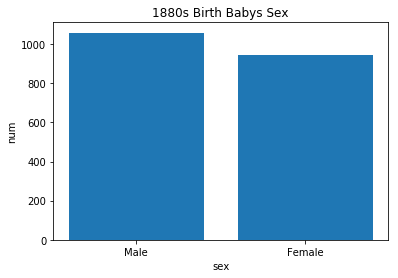

In [8]:
plt.bar(['Male','Female'],[m1880num,f1880num])
plt.title('1880s Birth Babys Sex')
plt.xlabel('sex')
plt.ylabel('num')
plt.show()

# 3. 년도별로 나눠져 있는 데이터를 하나의 DataFrame으로 합치기

주의
- 위에서와 마찬가지로 columns 이름은 'name', 'sex', 'births'로 지정
- 새로운 column 'year'을 추가해 각 데이터가 몇 년도의 데이터인지 정보를 함께 저장
- 최종 dataframe 객체의 이름은 names로 할 것

Hint
- for문
- 'yob%d' % 1880 -> yob1880
- pandas.concat

In [9]:
years = range(1880,2011)
pic =[]
columns = ['name','sex','births']

for year in years:
    file = './data/yob%d.txt' %year
    df=pd.read_csv(file,names=columns)
    
    df['year']=year
    pic.append(df)
    
names = pd.concat(pic,ignore_index=True)


In [10]:
names


,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


# 4. 년도별 여아 탄생, 남아 탄생 수의 변화 구하기

주의
- 그래프의 x축은 년도가 됨 (1880 -> 2010)
- 하나의 그래프에 여자, 남자의 변화를 모두 표현하되 그래프의 색과 라벨을 이용해 값을 구분할 수 있도록 할 것

## 4.1 년도별 여아 탄생, 남아 탄생 수

In [11]:
y_birth = names.pivot_table('births',index='year',columns='sex',aggfunc=sum)
y_birth

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
1885,133056,107802
1886,144538,110785
1887,145983,101412
1888,178631,120857


## 4.2 년도별 여아 탄생, 남아 탄생 수 변화 그래프

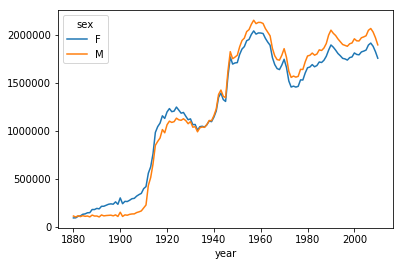

In [12]:
y_birth.plot()
plt.show()

# 5. 이름 사용 트렌드 분석

## 5.1 년도별 해당 이름이 얼마나 사용됐는지 구하기
그 해에 태어난 전체 아이중에 해당 성별의 그 이름을 가진 아이의 비율을 구해서 기존 dataframe에 새로운 column 'prop' 추가
- 예를 들어, 1880년에 태어난 200명 중, 여자 아이, 남자 아이가 각각 100명이고, 민수라는 이름을 가진 남자 아이가 3명, 여자 아이가 1명이라면, 각각의 prop은 0.03, 0.01가 됨

In [13]:
def add_prop(sex):
    births = sex.births.astype(float)
    sex['prop']=births/births.sum()
    return sex
names = names.groupby(['year','sex']).apply(add_prop)

In [14]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


## 5.2 많이 쓰인 이름 상위 500개 구하기
하나의 새로운 객체에 년도별, 성별별 많이 쓰인 이름 상위 500개의 정보를 저장

Hint
- groupby, apply
- sort_values
- reset_index

In [22]:
def getTop500(group):
    return group.sort_values(by='births',ascending=False)[:500]
result1 = names.groupby(['year','sex'])
top500=result1.apply(getTop500)
top500.index = np.arange(len(top500))
top500

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


## 5.3 년도별 상위 500개 이름의 비율이 시간에 따라 어떻게 변하는지 확인해보자
이름의 다양성 변화 분석: 최근들어 부모들이 점점 비슷한 이름을 사용하는 것을 거부하고 다른 아이들과는 다른 이름을 짓고자 한다는 가설을 확인해보자.

### 5.3.1 각 성별별로 년도별 상위 500개 이름이 총 차지하는 비율 구하기

In [25]:
Males = top500[top500.sex=='M']
Males

,name,sex,births,year,prop
500,John,M,9655,1880,0.087381
501,William,M,9533,1880,0.086277
502,James,M,5927,1880,0.053641
503,Charles,M,5348,1880,0.048401
504,George,M,5126,1880,0.046392
505,Frank,M,3242,1880,0.029341
506,Joseph,M,2632,1880,0.023821
507,Thomas,M,2534,1880,0.022934
508,Henry,M,2444,1880,0.022119
509,Robert,M,2416,1880,0.021866


여자 아이

In [26]:
Females = top500[top500.sex=='F']
Females

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


남자 아이

In [30]:
totals = top500.pivot_table('births',index='year',columns='name',aggfunc=sum)
totals

name,Aaden,Aaliyah,Aaron,Abbey,Abbie,Abbigail,Abby,Abe,Abel,Abigail,...,Zella,Zelma,Zina,Zion,Zoe,Zoey,Zola,Zona,Zora,Zula
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,102.0,NaN,71.0,NaN,NaN,50.0,NaN,NaN,...,31.0,19.0,NaN,NaN,23.0,NaN,NaN,NaN,28.0,27.0
1881,NaN,NaN,94.0,NaN,81.0,NaN,NaN,36.0,NaN,NaN,...,38.0,17.0,NaN,NaN,22.0,NaN,NaN,NaN,21.0,27.0
1882,NaN,NaN,85.0,NaN,80.0,NaN,NaN,50.0,NaN,NaN,...,50.0,21.0,NaN,NaN,25.0,NaN,NaN,17.0,32.0,21.0
1883,NaN,NaN,105.0,NaN,79.0,NaN,NaN,43.0,NaN,NaN,...,55.0,16.0,NaN,NaN,23.0,NaN,NaN,NaN,35.0,25.0
1884,NaN,NaN,97.0,NaN,98.0,NaN,NaN,45.0,NaN,NaN,...,63.0,29.0,NaN,NaN,31.0,NaN,NaN,NaN,58.0,27.0
1885,NaN,NaN,88.0,NaN,88.0,NaN,NaN,47.0,NaN,NaN,...,56.0,NaN,NaN,NaN,27.0,NaN,NaN,NaN,48.0,38.0
1886,NaN,NaN,86.0,NaN,84.0,NaN,NaN,50.0,16.0,NaN,...,72.0,32.0,NaN,NaN,25.0,NaN,NaN,20.0,52.0,43.0
1887,NaN,NaN,78.0,NaN,104.0,NaN,NaN,37.0,NaN,NaN,...,67.0,27.0,NaN,NaN,34.0,NaN,23.0,28.0,46.0,33.0
1888,NaN,NaN,90.0,NaN,137.0,NaN,NaN,46.0,NaN,NaN,...,111.0,37.0,NaN,NaN,42.0,NaN,NaN,30.0,42.0,45.0


### 5.3.2 각 성별별로 년도별 상위 500개 이름의 비율이 시간에 따라 어떻게 변하는지를 보이는 그래프

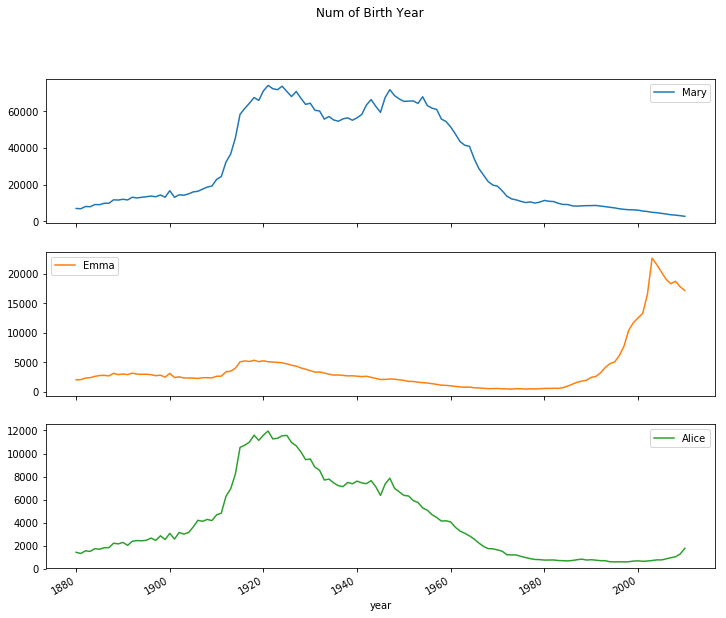

In [32]:
subset = totals[['Mary','Emma','Alice']]
subset.plot(subplots=True,figsize=(12,10),grid=False,title="Num of Birth Year")
plt.show()

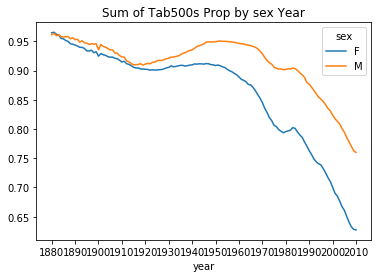

In [35]:
tab = top500.pivot_table('prop',index='year',columns='sex',aggfunc=sum)
tab.plot(title='Sum of Tab500s Prop by sex Year',xticks=range(1880,2020,10))
plt.show()

### 5.4 각 년도별로 많이 사용되는 이름순으로 아이들을 줄세웠을 때, 앞에서부터 전체 출생인구의 반에 해당하는 아이들이 가지는 이름의 종류의 수의 변화를 그래프로 나타내기

In [36]:
def get_count(group, q=0.5):
    group = group.sort_values(by='prop',ascending=False)
    return group.prop.cumsum().values.searchsorted(q)+1

result3=top500.groupby(['year','sex']).apply(get_count)
result3=result3.unstack('sex')
result3


sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
1885,40,16
1886,41,16
1887,41,17
1888,42,17


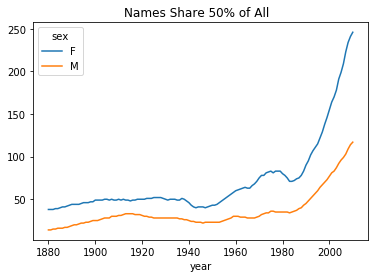

In [37]:
result3.plot(title='Names Share 50% of All  ')
plt.show()